In [0]:
# Import all tools
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn import ensemble
from sklearn.svm import SVC

In [0]:
# Function for making confusion matrixes, this will come in use later
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion m',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
# Import red wine data set
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
red_wine

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [0]:
# Create a list of feature names from the red wine data set
red_criteria = red_wine.columns
red_criteria = str(red_criteria[0])
red_criteria = red_criteria.replace('"','')
red_criteria = red_criteria.split(';')
red_criteria 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
# Seperate the scores into individual columns
red_score = []
for index, row in red_wine.iterrows():
  red_score_string = red_wine.iloc[index, 0] 
  red_score_string = red_score_string.split(';')
  red_score.append(red_score_string)
  red_scores = pd.DataFrame(red_score)
  
red_scores

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [0]:
# Add the feature names to the columns
red_scores.columns = red_criteria
red_wine_df = red_scores

In [0]:
# Add a dummy variable to identify red wines
red_wine_df['red'] = 1

In [0]:
# Call dataframe to make sure it looks right
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5,1
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6,1
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5,1


In [0]:
# Import red wine data set
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')
white_wine

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


In [0]:
# Create a list of feature names from the white wine data set
white_criteria = white_wine.columns
white_criteria = str(white_criteria[0])
white_criteria = white_criteria.replace('"','')
white_criteria = white_criteria.split(';')
white_criteria 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
# Seperate the scores into individual columns

white_score = []
for index, row in white_wine.iterrows():
  white_score_string = white_wine.iloc[index, 0] 
  white_score_string = white_score_string.split(';')
  white_score.append(white_score_string)
  white_scores = pd.DataFrame(white_score)
  
white_scores

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [0]:
# Add the feature names to the columns
white_scores.columns = white_criteria
white_wine_df = white_scores

In [0]:
# Add a dummy variable to identify white wines
white_wine_df['red'] = 0

In [0]:
# Call dataframe to make sure it looks right
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,0
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,0
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,0
4894,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,0


In [0]:
# Concactnate data frames into one data frame
wine_df = pd.concat([red_wine_df, white_wine_df], axis=0)
wine_df = wine_df.reset_index(drop=True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6,0
6493,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,0


In [0]:
# Check if we have any missing values in our data. There doesnt appear to be any.
wine_df.isnull().sum()/wine_df.isnull().count()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
red                     0.0
dtype: float64

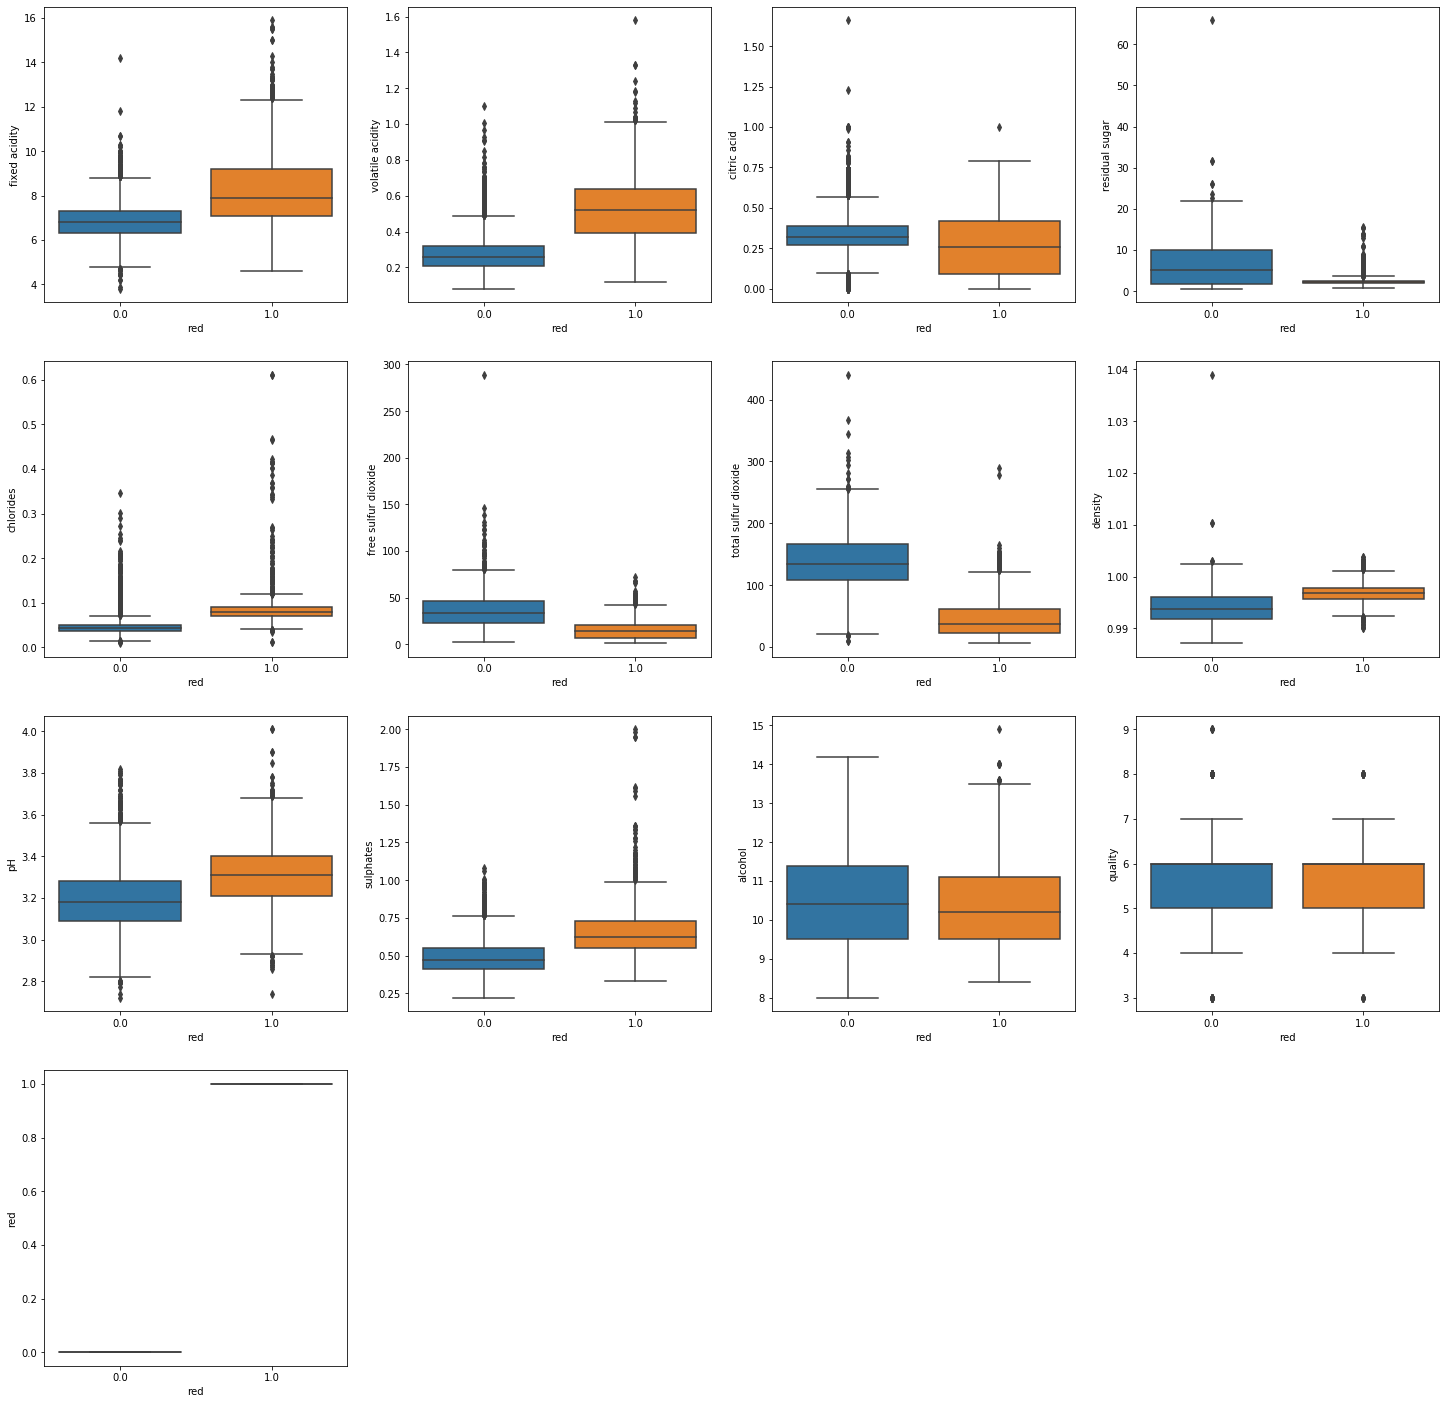

In [0]:
# Print the data as boxplots to check if there are any outliers. There appears to be many
# so we will move forward by standardizing and winsorizing the data. 
wine_df = wine_df.astype('float')

plt.figure(figsize=(25,25))

for index, column in enumerate(wine_df.columns):
  plt.subplot(4,4,index+1)
  sns.boxplot(y=column, x=wine_df.red, data=wine_df, whis=1.5)

plt.show()

In [0]:
# Standardize independent variables 
indep_table = wine_df.drop('red', axis=1)
stan_indep_table = StandardScaler().fit_transform(indep_table)
stan_indep_table = pd.DataFrame(stan_indep_table, columns=indep_table.columns)
stan_indep_table

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0.207999
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,1.353228


In [0]:
# Winsorize independent variables 
for col in stan_indep_table.columns: 
     stan_indep_table[col] = stats.mstats.winsorize(stan_indep_table[col], limits=0.1)

stan_indep_table

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,1.520643,-1.229353,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.253300,0.193097,-0.915464,-0.937230
1,0.451036,1.520643,-1.229353,-0.597640,0.855420,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,1.520643,-1.229353,-0.660699,0.855420,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,1.222442,-0.362438,1.179346,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,1.520643,-1.229353,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.253300,0.193097,-0.915464,-0.937230
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.322664,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230
6494,-0.551792,-0.605417,-0.885253,-0.870896,-0.429160,-0.029599,-0.083949,-0.719251,-1.234651,-0.478971,-0.915464,0.207999
6495,-0.937495,-0.301694,-0.128234,-0.870896,-0.714622,-0.593041,-0.101642,-1.342909,0.755710,-1.016626,1.516157,1.353228


In [0]:
# Make a seperate data frame for our dummy/target variable
dep_table = pd.DataFrame(wine_df['red'])
dep_table

,red
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6492,0.0
6493,0.0
6494,0.0
6495,0.0


In [0]:
# Concactnate both tables into one
clean_wine_df = pd.concat([stan_indep_table, dep_table], axis=1)
clean_wine_df 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,0.142473,1.520643,-1.229353,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.253300,0.193097,-0.915464,-0.937230,1.0
1,0.451036,1.520643,-1.229353,-0.597640,0.855420,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,1.0
2,0.451036,1.520643,-1.229353,-0.660699,0.855420,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,1.0
3,1.222442,-0.362438,1.179346,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,1.0
4,0.142473,1.520643,-1.229353,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.253300,0.193097,-0.915464,-0.937230,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0.207999,0.0
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.322664,0.924588,0.067824,-0.426067,-0.478971,-0.747766,-0.937230,0.0
6494,-0.551792,-0.605417,-0.885253,-0.870896,-0.429160,-0.029599,-0.083949,-0.719251,-1.234651,-0.478971,-0.915464,0.207999,0.0
6495,-0.937495,-0.301694,-0.128234,-0.870896,-0.714622,-0.593041,-0.101642,-1.342909,0.755710,-1.016626,1.516157,1.353228,0.0


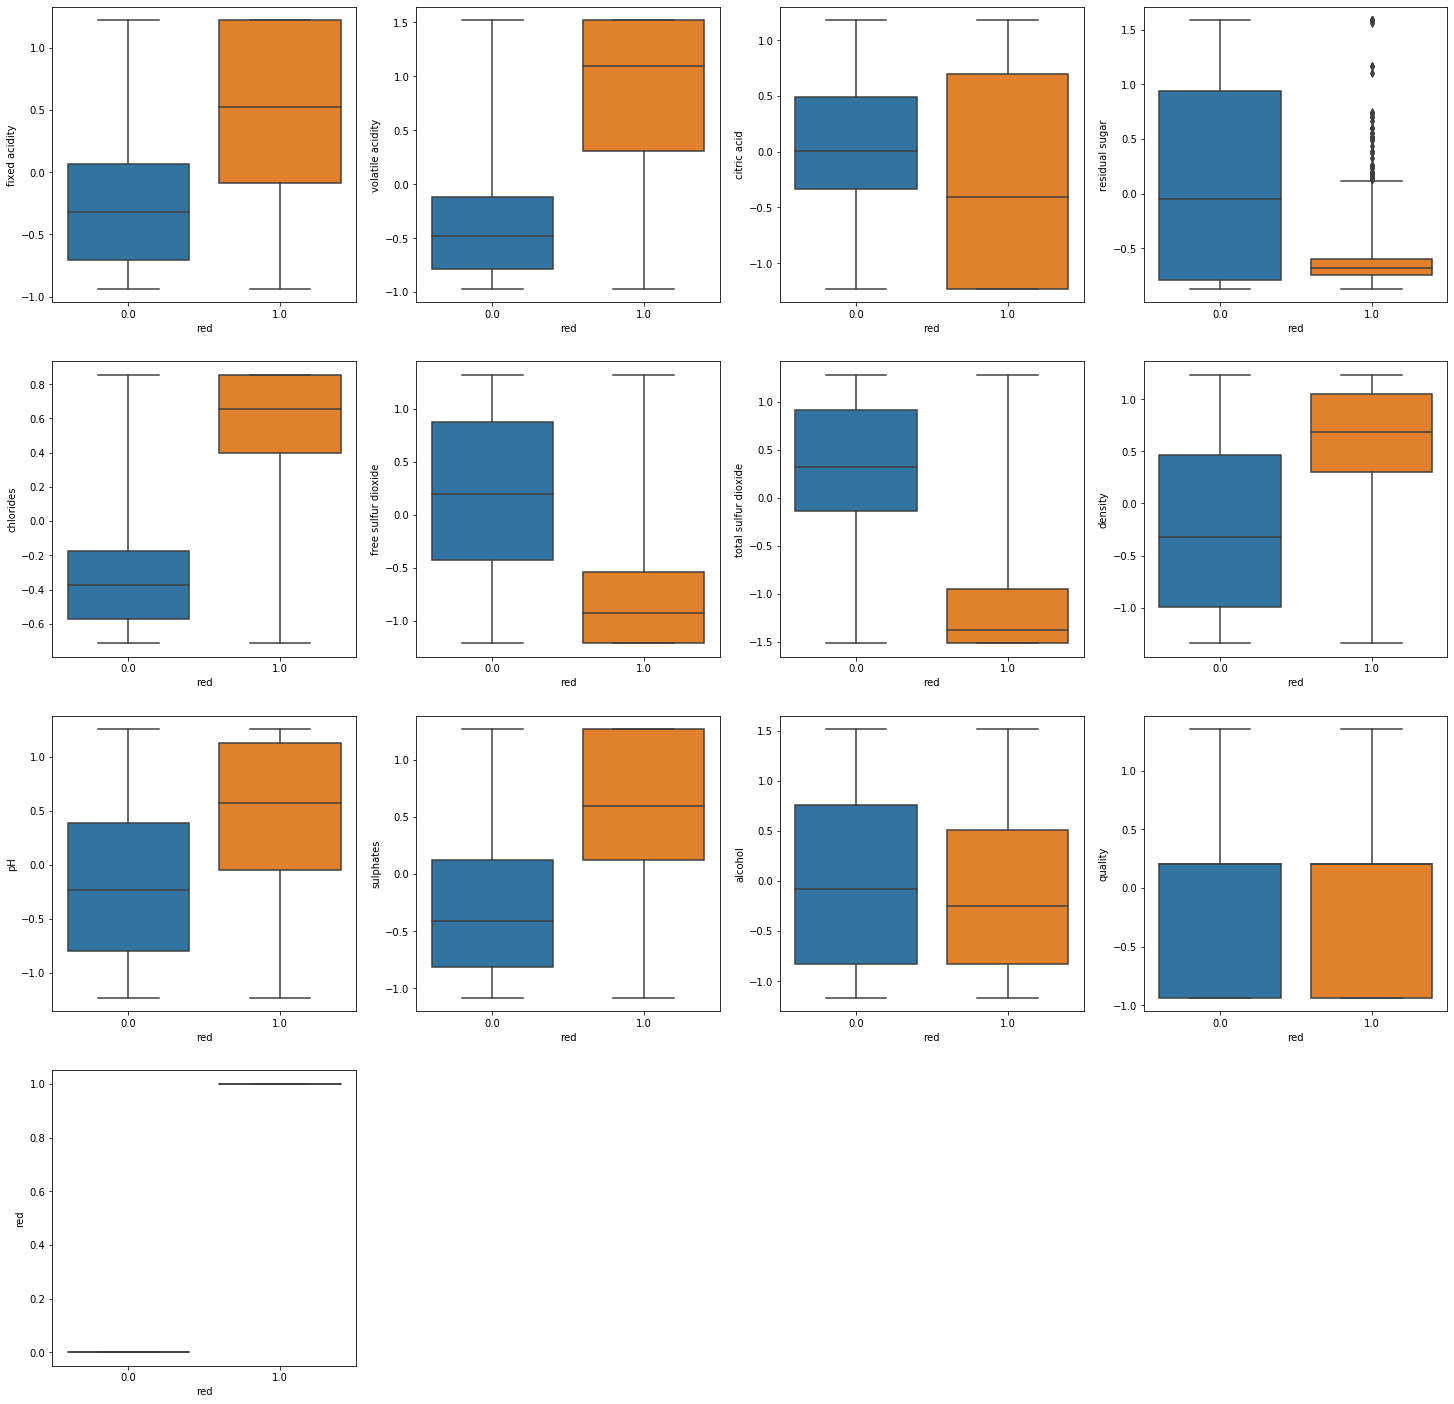

In [0]:
# Print box plots for all of our variables and seperate between both groups to see 
# what they look like now. That appear to be much more normal than before
plt.figure(figsize=(25,25))

for index, column in enumerate(clean_wine_df.columns):
  plt.subplot(4,4,index+1)
  sns.boxplot(y=column, x=clean_wine_df.red, data=clean_wine_df, whis=5)

plt.show()

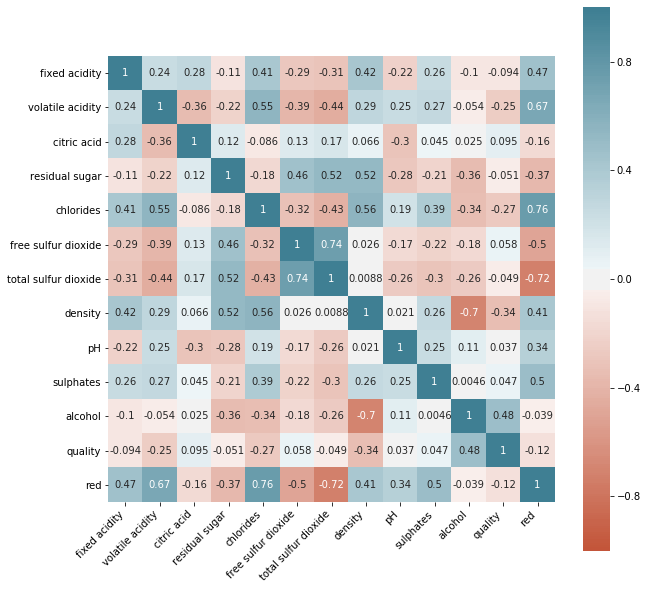

In [0]:
# Create a correlation matrix for the variables
wine_corr = clean_wine_df.corr(method ='pearson')

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    wine_corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [0]:
# Look at the correlation between the target variable and all the other variables
# Get the magnitude of each correlation 
red_corr = wine_corr['red']
red_corr = red_corr.abs()
red_corr = red_corr.drop('red')
red_corr

fixed acidity           0.465001
volatile acidity        0.669932
citric acid             0.163379
residual sugar          0.371008
chlorides               0.755747
free sulfur dioxide     0.502697
total sulfur dioxide    0.721740
density                 0.412679
pH                      0.338318
sulphates               0.499498
alcohol                 0.039112
quality                 0.124419
Name: red, dtype: float64

In [0]:
# Make a list of the variables with the largest correlation with the target
imp_vars = red_corr.nlargest(2)
imp_vars = imp_vars.reset_index()
list_imp_vars = imp_vars['index']
list_imp_vars = list_imp_vars.tolist()
list_imp_vars

more_vars = red_corr.nlargest(3)
more_vars = more_vars.reset_index()
list_more_vars = more_vars['index']
list_more_vars = list_more_vars.tolist()
list_more_vars

Linear Classifier 

Score on training data:  0.9645608628659477
Score on test data:  0.9707592339261286
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4417
         1.0       0.95      0.93      0.94      1431

    accuracy                           0.97      5848
   macro avg       0.96      0.96      0.96      5848
weighted avg       0.97      0.97      0.97      5848



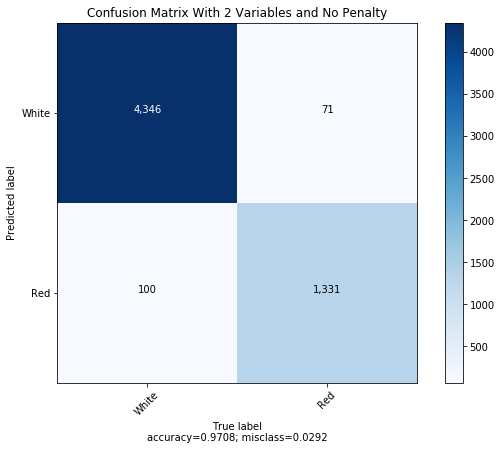

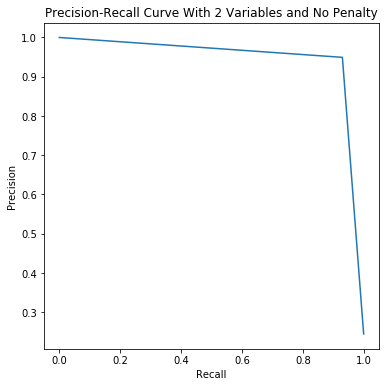

Mean cross validatiion score: 0.965


In [0]:
# Run a linear classifer test using 2 VARIABLES with NO PENTALY

# Split our data set into a test and training group
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1) 

# Fit the data for a linear classification without a pentalty
lr = LogisticRegression(solver='lbfgs', penalty='none')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Using the test set, predict the outcome and compare it to our true outcome
# to get an idea of how successful our model is
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a confusion matrix to see how well our model performed
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix With 2 Variables and No Penalty',normalize=False)

# Since were dealing with an imbalanced set, use a Precision-Recall Curve to visualize
# the success of our model 
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve With 2 Variables and No Penalty')
plt.show()

# Conduct a cross validation to see how well our model performs
cv_scores = cross_val_score(lr, X_train, y_train, cv = 10)

print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Score on training data:  0.9707241910631741
Score on test data:  0.969562243502052
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4407
         1.0       0.95      0.92      0.94      1441

    accuracy                           0.97      5848
   macro avg       0.96      0.95      0.96      5848
weighted avg       0.97      0.97      0.97      5848



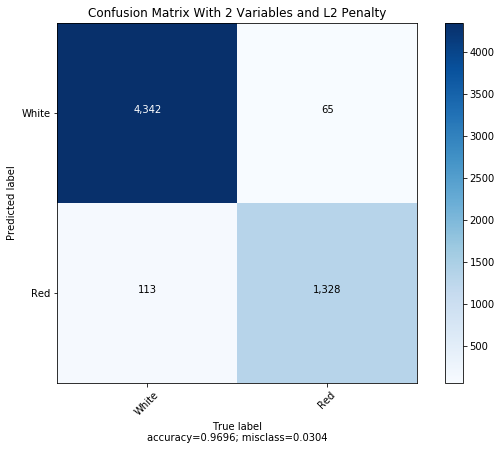

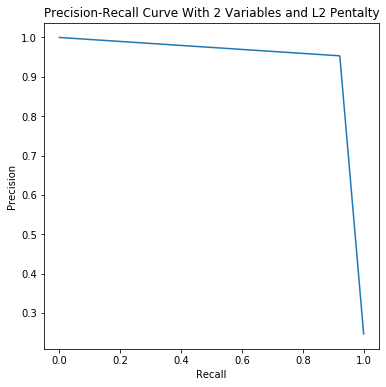

Mean cross validatiion score: 0.968


In [0]:
# Run a linear classifer test using 2 VARIABLES WITH PENTALY

# Split our data set into a test and training group
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1) 

# Fit the data for a linear classification without a pentalty
lr = LogisticRegression(solver='lbfgs', penalty='l2')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Using the test set, predict the outcome and compare it to our true outcome
# to get an idea of how successful our model is
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a confusion matrix to see how well our model performed
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix With 2 Variables and L2 Penalty',normalize=False)

# Since were dealing with an imbalanced set, use a Precision-Recall Curve to visualize
# the success of our model 
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve With 2 Variables and L2 Pentalty')
plt.show()

# Conduct a cross validation to see how well our model performs
cv_scores = cross_val_score(lr, X_train, y_train, cv = 10)

print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Score on training data:  0.9768875192604006
Score on test data:  0.978796169630643
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4400
         1.0       0.96      0.95      0.96      1448

    accuracy                           0.98      5848
   macro avg       0.97      0.97      0.97      5848
weighted avg       0.98      0.98      0.98      5848



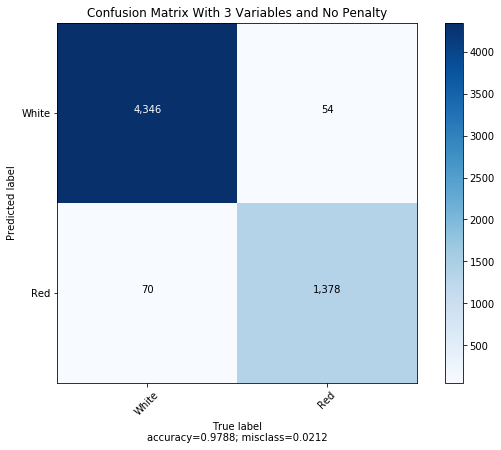

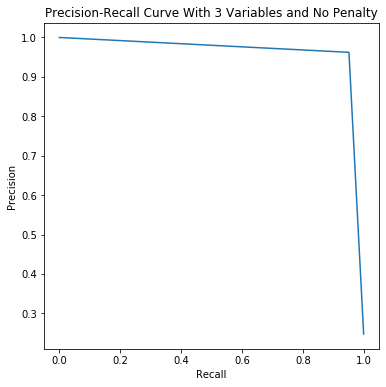

Mean cross validatiion score: 0.978


In [0]:
# Run a linear classifer test using 3 VARIABLES with NO PENTALY

# Split our data set into a test and training group
X = clean_wine_df[list_more_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1) 

# Fit the data for a linear classification without a pentalty
lr = LogisticRegression(solver='lbfgs', penalty='none')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Using the test set, predict the outcome and compare it to our true outcome
# to get an idea of how successful our model is
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a confusion matrix to see how well our model performed
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix With 3 Variables and No Penalty',normalize=False)

# Since were dealing with an imbalanced set, use a Precision-Recall Curve to visualize
# the success of our model 
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve With 3 Variables and No Penalty')
plt.show()

# Conduct a cross validation to see how well our model performs
cv_scores = cross_val_score(lr, X_train, y_train, cv = 10)

print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Score on training data:  0.9645608628659477
Score on test data:  0.9687072503419972
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4421
         1.0       0.93      0.94      0.94      1427

    accuracy                           0.97      5848
   macro avg       0.96      0.96      0.96      5848
weighted avg       0.97      0.97      0.97      5848



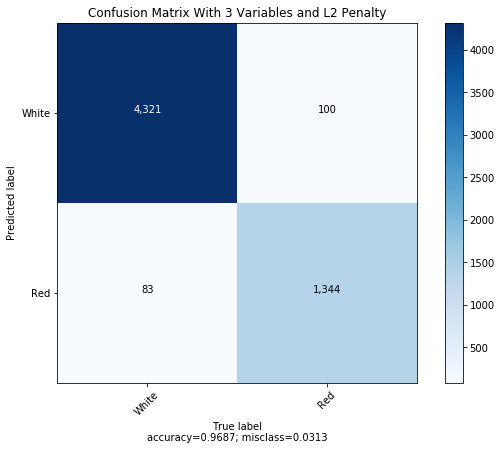

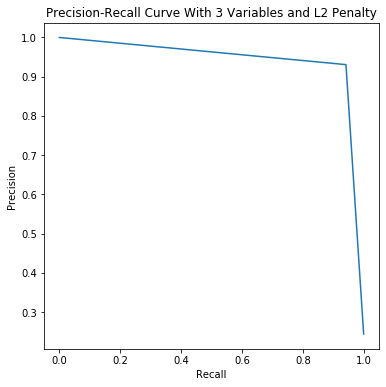

Mean cross validatiion score: 0.965


In [0]:
# Run a linear classifer test using 3 VARIABLES with L2 PENTALY

# Split our data set into a test and training group
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1) 

# Fit the data for a linear classification without a pentalty
lr = LogisticRegression(solver='lbfgs', penalty='none')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Using the test set, predict the outcome and compare it to our true outcome
# to get an idea of how successful our model is
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a confusion matrix to see how well our model performed
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix With 3 Variables and L2 Penalty',normalize=False)

# Since were dealing with an imbalanced set, use a Precision-Recall Curve to visualize
# the success of our model 
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve With 3 Variables and L2 Penalty')
plt.show()

# Conduct a cross validation to see how well our model performs
cv_scores = cross_val_score(lr, X_train, y_train, cv = 10)

print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

In [0]:
# Between all parameters, the two best models are the model with 2 variables and 
# no pentaly and the model with 3 variables and l2 penalty. However, the cross validation 
# score is higher for the mdoel with 2 variables and no penalty; therefore, this is
# the best linear model. 

SVC

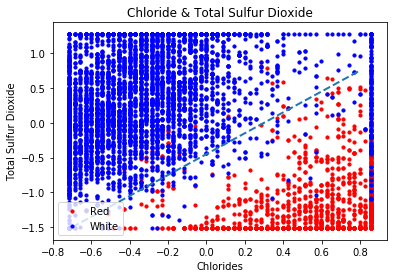

In [0]:
# Create a graph to show a relationship between out two independent variables
plt.scatter(
    clean_wine_df[clean_wine_df['red'] == 1]['chlorides'],
    clean_wine_df[clean_wine_df['red'] == 1]['total sulfur dioxide'],
    color='red', s = 10
)
plt.scatter(
    clean_wine_df[clean_wine_df['red'] == 0]['chlorides'],
    clean_wine_df[clean_wine_df['red'] == 0]['total sulfur dioxide'],
    color='blue', s = 10
)

plt.legend(['Red', 'White'])
plt.title('Chloride & Total Sulfur Dioxide')
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')

plt.plot([-.7, .8], [-1.5, .75], '--', lw=2, alpha=1)

plt.show()

In [0]:
# Focus on our 2 independent variables for the SVC
X = clean_wine_df[['chlorides', 'total sulfur dioxide']]
Y = clean_wine_df['red']
svc = SVC(kernel = 'linear')
svc.fit(X, Y)

# Get an SVC score
print("SVC score: {}".format(svc.score(X, Y)))

# Get a cross validation score
print("Cross validation score: {}".format(cross_val_score(svc, X, Y, cv=5).mean()))

# Use the test set to get a predicted value and compare it to the true value
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

SVC score: 0.9699861474526704
Cross validation score: 0.969524723159827
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4399
         1.0       0.95      0.93      0.94      1449

    accuracy                           0.97      5848
   macro avg       0.96      0.96      0.96      5848
weighted avg       0.97      0.97      0.97      5848



KNN Classifer 

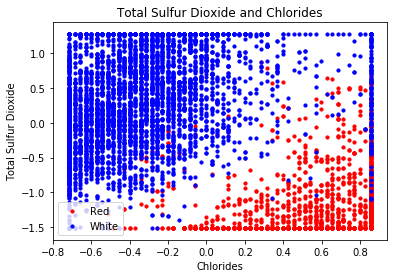

In [0]:
# Plot our two main variables to see how they are related
plt.scatter(
    clean_wine_df[clean_wine_df['red'] == 1]['chlorides'],
    clean_wine_df[clean_wine_df['red'] == 1]['total sulfur dioxide'],
    color='red', s = 10
)
plt.scatter(
    clean_wine_df[clean_wine_df['red'] == 0]['chlorides'],
    clean_wine_df[clean_wine_df['red'] == 0]['total sulfur dioxide'],
    color='blue', s = 10
)


plt.legend(['Red', 'White'])
plt.title('Total Sulfur Dioxide and Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

In [0]:
# Call a KNN Neighbors Classifier with 10 NEIGHBORS UNWEIGHED
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
X = clean_wine_df[list_imp_vars]
Y = clean_wine_df.red
neighbors.fit(X,Y)

# Get a score for the classification 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.1) 

test_score = neighbors.score(X_test, y_test)
train_score = neighbors.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get a cross validation score
print('Mean cross validation score: {}'.format(cross_val_score(neighbors, X, Y, cv=5).mean()))

Score on training data:  0.9861325115562404
Score on test data:  0.990766073871409
Mean cross validation score: 0.9682940723633564


In [0]:
# Call a KNN Neighbors Classifier with 10 NEIGHBORS WEIGHED BY DISTANCE
neighbors = KNeighborsClassifier(n_neighbors=10, weights='distance')
X = clean_wine_df[list_imp_vars]
Y = clean_wine_df.red
neighbors.fit(X,Y)

# Get a score for the classification 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.1) 

test_score = neighbors.score(X_test, y_test)
train_score = neighbors.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get a cross validation score
print('Mean cross validation score: {}'.format(cross_val_score(neighbors, X, Y, cv=5).mean()))

Score on training data:  0.9969183359013868
Score on test data:  0.9895690834473324
Mean cross validation score: 0.9689095754130397


In [0]:
# Call a KNN Neighbors Classifier with 5 NEIGHBORS NOT WEIGHED
neighbors = KNeighborsClassifier(n_neighbors=5)
X = clean_wine_df[list_imp_vars]
Y = clean_wine_df.red
neighbors.fit(X,Y)

# Get a score for the classification 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.1) 

test_score = neighbors.score(X_test, y_test)
train_score = neighbors.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get a cross validation score
print('Mean cross validation score: {}'.format(cross_val_score(neighbors, X, Y, cv=5).mean()))

Score on training data:  0.9799691833590138
Score on test data:  0.9801641586867305
Mean cross validation score: 0.9709104044531296


In [0]:
# Call a KNN Neighbors Classifier with 5 NEIGHBORS WEIGHED BY DISTANCE
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
X = clean_wine_df[list_imp_vars]
Y = clean_wine_df.red
neighbors.fit(X,Y)

# Get a score for the classification 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.1) 

test_score = neighbors.score(X_test, y_test)
train_score = neighbors.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get a cross validation score
print('Mean cross validation score: {}'.format(cross_val_score(neighbors, X, Y, cv=5).mean()))

Score on training data:  0.9845916795069337
Score on test data:  0.99093707250342
Mean cross validation score: 0.9682940723633564


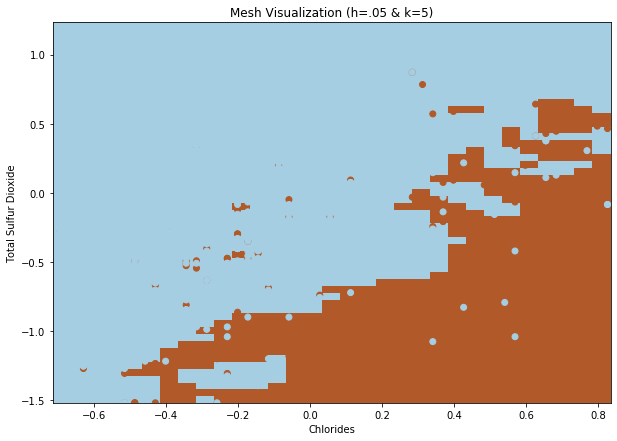

In [0]:
# Since the data seems to behave best in the last model, where k=5 and and weights were used, 
# we will create a mesh using this model. Here we have a mesh where h = .05.
X = np.array(X)
Y = np.array(Y)

h = .05

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max= X[:, 1].min(), X[:, 1].max() 

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Mesh Visualization (h=.05 & k=5)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

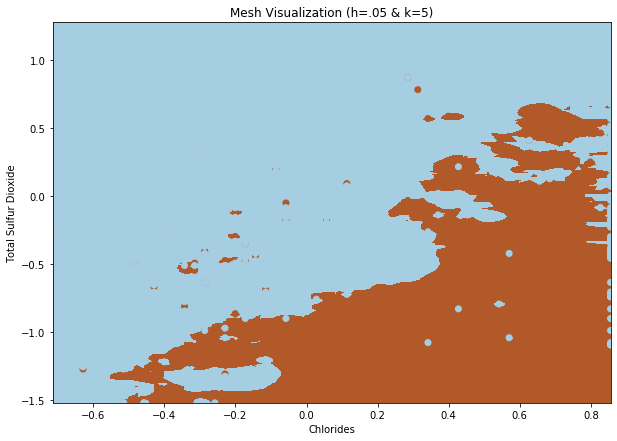

In [0]:
# Here we have a mesh where h = .01.
X = np.array(X)
Y = np.array(Y)

h = .001

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max= X[:, 1].min(), X[:, 1].max() 

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Mesh Visualization (h=.05 & k=5)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

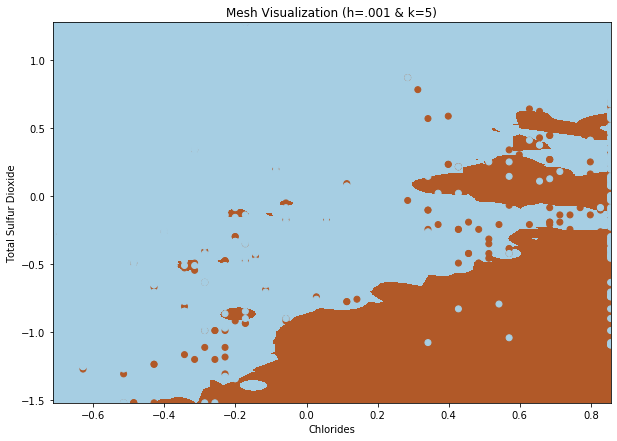

In [0]:
# Here we have a mesh where h = .001.

X = np.array(X)
Y = np.array(Y)

h = .001

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max= X[:, 1].min(), X[:, 1].max() 

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Mesh Visualization (h=.001 & k=5)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Notice how much smoother the mesh becomes as we decrease the size of h.
# We also begin to notice the increaseing influence of the blue (white wine)
# on the right hand boarder, which indiciates that many of our
# original obsrvations were winsorized to this value. 

Score on training data:  0.9969183359013868
Score on test data:  0.9649452804377565
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      4401
         1.0       0.95      0.91      0.93      1447

    accuracy                           0.96      5848
   macro avg       0.96      0.95      0.95      5848
weighted avg       0.96      0.96      0.96      5848



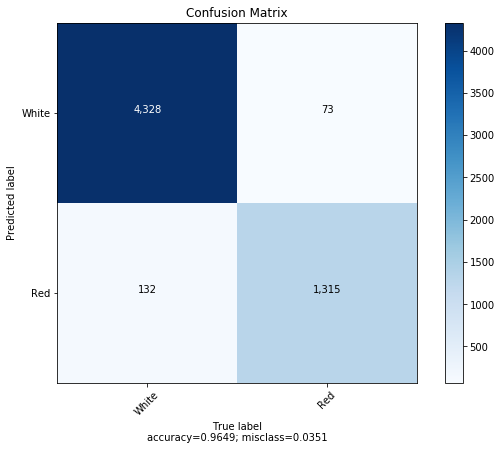

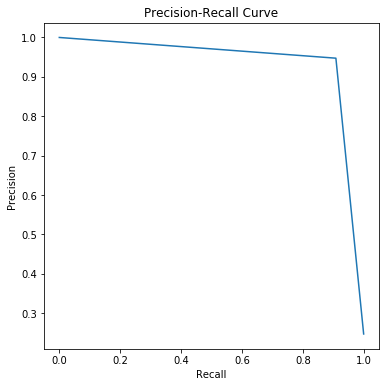

In [0]:
# Now we will visualize the predicitive power of our best model, which is that 
# where k = 5 with weights. Split the data set so I can use the test set to 
# measure predictive power
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1) 

knn = neighbors.fit(X_train, y_train)

test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Predict the target using the independent variables and compare it to the true values
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

# Vizualize the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix',normalize=False)

# Since the data set is imbalanced use a precision recall curve to visualize the 
# predictive power
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Decision Tree 

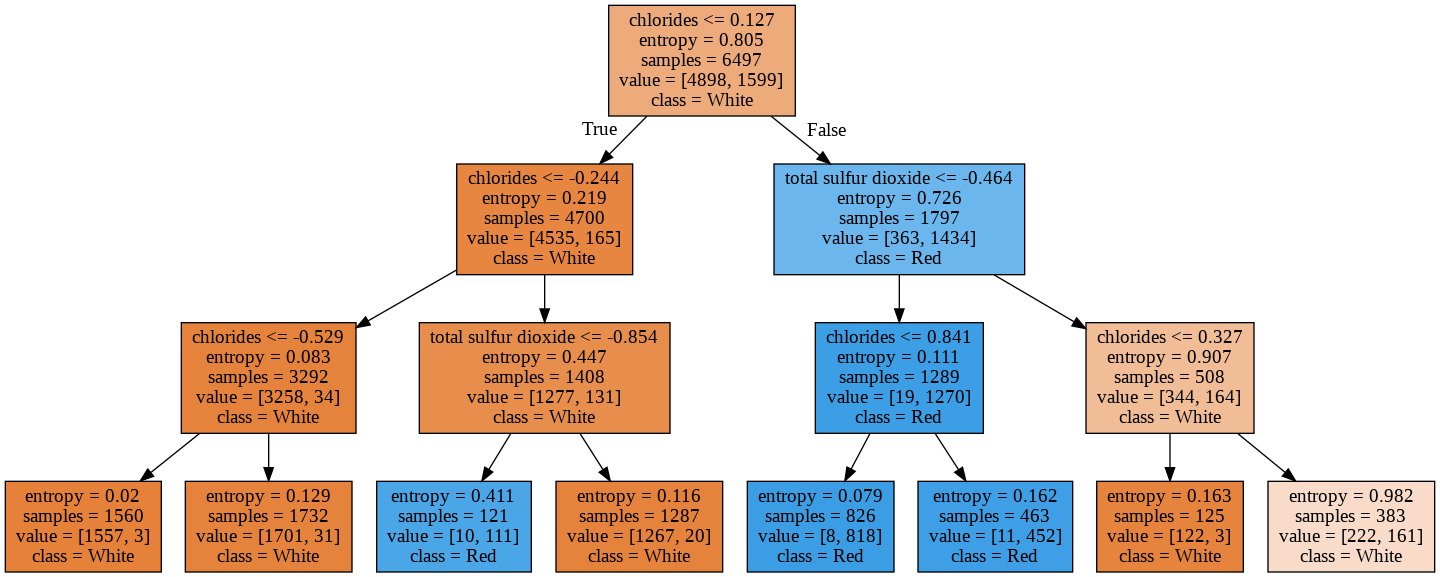

In [0]:
# Create a short decision tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
)
decision_tree.fit(clean_wine_df[list_imp_vars], clean_wine_df.red)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=list_imp_vars,
    class_names=['White', 'Red'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Score on training data:  0.9567901234567902
Score on test data:  0.9562611372104325
Mean cross validation score: 0.940278912773139
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      4660
         1.0       0.95      0.87      0.91      1513

    accuracy                           0.96      6173
   macro avg       0.95      0.93      0.94      6173
weighted avg       0.96      0.96      0.96      6173



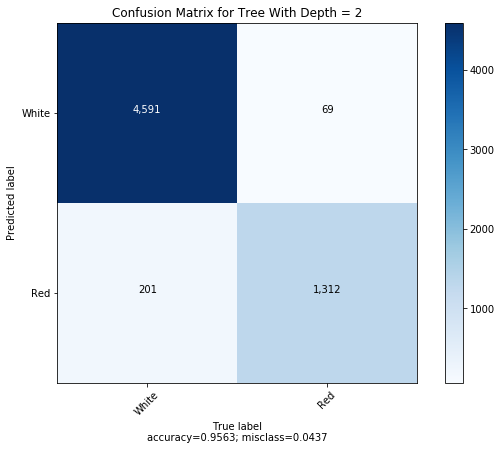

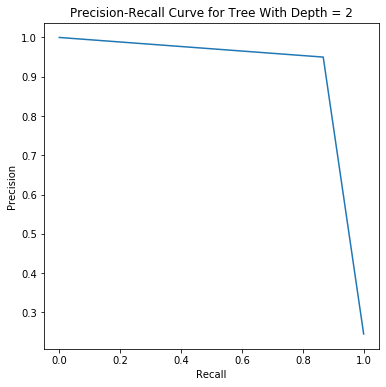

In [0]:
# Split the test set to run a decision tree classifier on it with a depth of 2
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.05) 

dt = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=2,
)

dt.fit(X, y)

test_score = dt.score(X_test, y_test)
train_score = dt.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get cv score
print('Mean cross validation score: {}'.format(cross_val_score(dt, X, Y, cv=5).mean()))

# Use the test set to predict the outcome and compare it to its true value
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

# Vizualize the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix for Tree With Depth = 2',normalize=False)

# Visualize the Precision-Recall Curve
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tree With Depth = 2')
plt.show()

Score on training data:  0.9444444444444444
Score on test data:  0.9577190993034181
Mean cross validation score: 0.9595202226564814
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4652
         1.0       0.97      0.85      0.91      1521

    accuracy                           0.96      6173
   macro avg       0.96      0.92      0.94      6173
weighted avg       0.96      0.96      0.96      6173



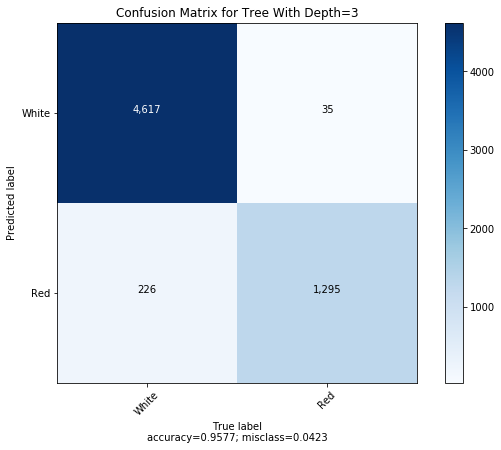

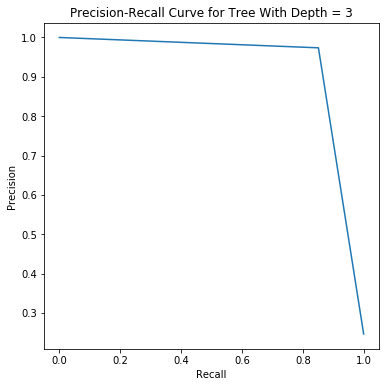

In [0]:
# Split the test set to run a decision tree classifier on it with a depth of 3
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.05) 

dt = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3,
)

dt.fit(X, y)

test_score = dt.score(X_test, y_test)
train_score = dt.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get cv score
print('Mean cross validation score: {}'.format(cross_val_score(dt, X, Y, cv=5).mean()))

# Use the test set to predict the outcome and compare it to its true value
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

# Vizualize the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix for Tree With Depth=3',normalize=False)

# Visualize the Precision-Recall Curve
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tree With Depth = 3')
plt.show()

Score on training data:  0.96875
Score on test data:  0.9905176434012125
Mean cross validation score: 0.9682937170604606
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4848
         1.0       0.98      0.98      0.98      1585

    accuracy                           0.99      6433
   macro avg       0.99      0.99      0.99      6433
weighted avg       0.99      0.99      0.99      6433



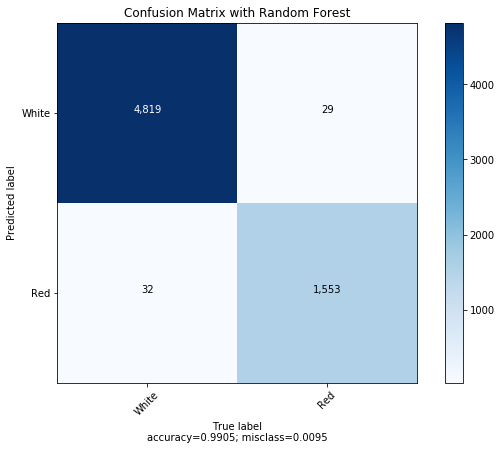

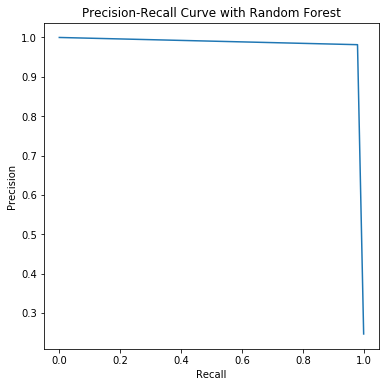

In [0]:
# Split the data set and create a random forest model
X = clean_wine_df[list_imp_vars]
y = clean_wine_df['red']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.01) 

rfc = ensemble.RandomForestClassifier()

rfc.fit(X, y)

test_score = rfc.score(X_test, y_test)
train_score = rfc.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

# Get a cross validation score
print('Mean cross validation score: {}'.format(cross_val_score(rfc, X, Y, cv=5).mean()))

# Compare the predicted value to the true value
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=confusion, target_names = ['White', 'Red'], title = 'Confusion Matrix with Random Forest',normalize=False)

# Create a Precision- Recall Curve
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Random Forest')
plt.show()

At a chemical level, the differences between red wine & white wine are very clear to a machine, thus classifications are extremely effective in nearly every model. Chlorides and Sulfur Dioxide appear to be the most influential variables in this classification problem. Apparently, computers can immediately identify white wines by their abnormaly high levels of chlorides and sulfur dioxide. Of all the models tested, the linear classifier and tree models were the most effective. In particular, the Random Forest Model performed at the highest level of accuracy without being overfit to the data
